# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [17]:
# Your code here
import pandas as pd

data = pd.read_csv(r'C:\Users\Daniel Carvalho\Desktop\DataAnalysis\WEEK7\DAY4\labs\lab-imbalance\PS_20174392719_1491204439457_log.csv').sample(n=100000)
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
134364,11,CASH_IN,63402.09,C1610152695,220.00,63622.09,C2116285782,764063.11,1397717.72,0,0
2805349,225,PAYMENT,35153.23,C2146817319,149911.95,114758.72,M1426697974,0.00,0.00,0,0
2624794,208,CASH_OUT,173949.92,C822459157,229678.15,55728.23,C793116596,7751776.83,7925726.75,0,0


### What is the distribution of the outcome? 

In [18]:
data['isFraud'].value_counts()

0    99857
1      143
Name: isFraud, dtype: int64

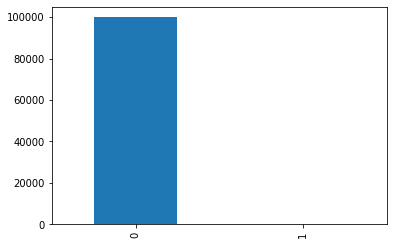

In [19]:
# Your response here
import matplotlib.pyplot as plt
count_class = pd.value_counts(data['isFraud'])
count_class.plot(kind='bar')
plt.show()

In [22]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
134364,11,CASH_IN,63402.09,C1610152695,220.00,63622.09,C2116285782,764063.11,1397717.72,0,0
2805349,225,PAYMENT,35153.23,C2146817319,149911.95,114758.72,M1426697974,0.00,0.00,0,0
2624794,208,CASH_OUT,173949.92,C822459157,229678.15,55728.23,C793116596,7751776.83,7925726.75,0,0
1906681,166,CASH_OUT,23752.01,C11169511,21376.00,0.00,C378897201,385481.29,74485.54,0,0
4100102,301,CASH_IN,313576.86,C1494862854,21473405.04,21786981.91,C1253040515,7963543.31,7649966.44,0,0


### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [23]:
data = data.drop(columns=['type', 'nameOrig','nameDest'])
data['step'] = data['step'].astype(float)

In [24]:
# Your code here
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.026004,-0.013405,-0.013704,0.030670,0.029147,0.035254,NaN
amount,0.026004,1.000000,-0.003682,-0.008972,0.295318,0.466679,0.078436,NaN
oldbalanceOrg,-0.013405,-0.003682,1.000000,0.998807,0.066678,0.041310,0.010898,NaN
newbalanceOrig,-0.013704,-0.008972,0.998807,1.000000,0.068186,0.040854,-0.008077,NaN
oldbalanceDest,0.030670,0.295318,0.066678,0.068186,1.000000,0.974118,-0.006947,NaN
newbalanceDest,0.029147,0.466679,0.041310,0.040854,0.974118,1.000000,0.001060,NaN
isFraud,0.035254,0.078436,0.010898,-0.008077,-0.006947,0.001060,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Run a logisitc regression classifier and evaluate its accuracy.

In [25]:
# Your code here
from sklearn.linear_model import LogisticRegression

X = data.drop(columns=['isFraud'])
y = data['isFraud']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.99808

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24961
           1       0.41      0.51      0.45        39

    accuracy                           1.00     25000
   macro avg       0.70      0.76      0.73     25000
weighted avg       1.00      1.00      1.00     25000



In [27]:
confusion_matrix(y_test,pred)

array([[24932,    29],
       [   19,    20]], dtype=int64)

### Now pick a model of your choice and evaluate its accuracy.

In [29]:
from sklearn.utils import resample

train = pd.concat([X_train,y_train], axis=1)

no_fraud = train[train['isFraud'] == 0]
yes_fraud = train[train['isFraud'] == 1]

yes_fraud_oversampled = resample(yes_fraud, 
replace=True, 
n_samples=len(no_fraud), 
random_state=0)

train_oversampled = pd.concat([no_fraud,yes_fraud_oversampled])

X_train_over = train_oversampled.drop(columns=['isFraud'])
y_train_over = train_oversampled['isFraud']

model.fit(X_train_over,y_train_over)
pred = model.predict(X_test)

print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     24961
           1       0.02      1.00      0.03        39

    accuracy                           0.91     25000
   macro avg       0.51      0.95      0.49     25000
weighted avg       1.00      0.91      0.95     25000



array([[22681,  2280],
       [    0,    39]], dtype=int64)

### Which model worked better and how do you know?

In [30]:
# Your response here

## The problem here with the logistic regression is that it doest not catch the frauds at all, it has 0 recall so our model is horrible
## even though we are very precise because of the inbalanced data..

## meanwhile the second method we loose a litle bit of precision but we managed to capture everything single fraud and therefore save a lot of money.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.